# The acceleration of a car

Un certo autoveicolo con motore diesel può passare da $0$ a $100~km/h$ in $10$ secondi. Supponendo per semplicità che il **moto** sia rettilineo **uniformemente accelerato** (cioè con accelerazione costante) calcolare il valore dell'accelerazione e lo spazio percorso nei primi $10$ secondi per raggiungere la velocità di $100~km/h$.


### Discussione del problema

#### Calcolo dell'accelerazione
Supponiamo che il moto si svolga lungo un asse $x$ orizzontale, con origine $O$ nella posizione iniziale dell'automobile, che immaginiamo per semplicità come un oggetto puntiforme.

Se l'automobile si muove con accelerazione costante, per la definizione di accelerazione si ha

$$ a = \dfrac{v - v_0}{t - t_0} $$

In questo caso, per calcolare l'accelerazione in $m/s^2$ occorre prima convertire il valore della velocità finale da $km/h$ a $m/s$.

#### Calcolo dello spazio percorso
Nel moto unidimensionale con accelerazione costante si ha

$$ x = x_0 + v_0(t-t_0) + \dfrac{1}{2}a (t-t_0)^2 $$

Per $x_0 = 0$ e $v_0 = 0$, l'equazione che esprime $x$ in funzione del tempo $t$ (**legge oraria**) diventa

$$ x = \dfrac{1}{2}a (t-t_0)^2 $$

Sostituendo il valore di $a$ ottenuto nella prima parte del problema, si può ricavare il valore di $x$, che corrisponde allo spazio percorso durante i primi $(t-t_0)$ secondi.

Con il calcolo simbolico si ottiene
$$ x = \dfrac{1}{2} \dfrac{v - v_0}{t - t_0} (t-t_0)^2 = \dfrac{1}{2} (v - v_0) (t-t_0) $$

In questo problema $x$ rappresenta la distanza che bisogna percorrere con accelerazione costante $a$ per arrivare alla velocità di 100 km/h.


### Calcoli con Python

Per calcolare l'accelerazione e lo spazio percorso utilizziamo le equazioni che abbiamo ricavato. Poichè il tempo necessario per andare da 0 a 100 km/h dipende dal tipo di veicolo che consideriamo, utilizziamo uno **slider** in modo da poter assegnare valori diversi alla variabile che rappresenta il tempo e stimare di conseguenza i risultati corrispondenti.

> Per lavorare in modalità interattiva ed eseguire il codice Python in ambiente **binder** online,

[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/POSS-UniMe/simple-physics-with-Python-ITA/master?filepath=notebook%2F1-2-2-AccelerazioneAutomobile.ipynb)

In [1]:
import ipywidgets as widgets

vf = 100/3.6     # velocità finale (m/s)
v0 = 0          # velocità iniziale (m/s)

print()
print('\nVelocità finale = {0:0.3f} m/s \n'.format(vf))

sliderDt = (
    widgets.FloatSlider(min = 0, max = 20, step = 0.1, 
                        value = 10, description = 'Tempo (s)'))     # tempo (s)

def calculate(Dt):
    a = (vf-v0)/Dt    # accelerazione (m/s^2)
    print('\nAccelerazione = {0:0.3f} m/s^2 \n'.format(a))
    Dx = 0.5*(vf-v0)*Dt    # spazio percorso (m)
    print('Spazio percorso nei primi {0:0.2f} secondi = {1:0.3f} m'.format(Dt,Dx))
    print()  
    
widgets.interact(calculate, Dt = sliderDt)



Velocità finale = 27.778 m/s 



interactive(children=(FloatSlider(value=10.0, description='Tempo (s)', max=20.0), Output()), _dom_classes=('wi…

<function __main__.calculate(Dt)>

Car & model | Time 0 to 100 km/h | Source
-------------|---------------|--------------
Tesla model 3 | 3.4 s | [Tesla](https://www.tesla.com/it_it/model3)
Renault Kadjar dCi 115 cv Sport Edition | 11.7 s | [automoto.it](https://www.automoto.it/catalogo/renault/kadjar/dci-8v-115cv-sport-edition/132970/amp)
Toyota 1.5 Hybrid VVT-i | 9.7 s | [Toyota](https://www.toyota.it/)
Fiat Bravo 1.6 Multijet 16V 105 CV | 11.2 s | [Al volante](https://www.alvolante.it/)
Porsche Taycan Turbo S | 2.8 s | [Porsche](https://www.porsche.com/italy/models/taycan/taycan-models/taycan-turbo-s/)

### Get a feel of
Confrontare il valore dell'accelerazione $a$ con il valore dell'accelerazione che caratterizza la caduta libera, cioè l'accelerazione di gravità.

&nbsp;


## Approfondimento
### Rappresentazione grafica delle equazioni del moto

Consideriamo l'intervallo di tempo che va dall'istante iniziale $t_0$ all'istante $t_0 + \Delta t$. Vogliamo rappresentare graficamente i valori delle grandezze fisiche che caratterizzano il moto: si tratta dell'accelerazione $a$, della velocità $v$ e della coordinata $x$ (che descrive la posizione dell'automobile) in funzione del tempo $t$.

A questo scopo consideriamo un array di valori di tempo equidistanti fra loro utilizzando la funzione **linspace** della libreria **numpy**. Poi, per il valore assegnato dell'accelerazione $a$, calcoliamo i valori della velocità $v$ secondo l'equazione 

$$ v =  v_0 + a\cdot(t - t_0) $$

e i valori di $x$ secondo l'equazione

$$ x = x_0 + v_0 \cdot(t - t_0 ) + \dfrac{1}{2} a\cdot (t - t_0 ) ^2 $$.





In [2]:
import numpy as np
import matplotlib.pyplot as plt

t0 = 0
x0 = 0
Dt = sliderDt.value
a = (vf-v0)/Dt
print('acceleration = ', a)
numpoints = 100

t = np.linspace(t0,t0 + Dt,numpoints)

#print('Dt = ', Dt)
#print('numpoints = ', numpoints)
#print('times = ', t)

v = v0 + a * (t - t0)

x = x0 + v0 * (t - t0) + 0.5 * a * (t - t0)**2

fig1 = plt.figure(figsize=(7, 13))

plt.subplot(3, 1, 1)
plt.axhline(y = a, xmin = 0.05, xmax = 0.95, color = 'green', linewidth = 3)
plt.axhline(y=0, color = 'gray', zorder = -1)
plt.axvline(x=t0, zorder = -1, linestyle = '--')
plt.axvline(x=t0+Dt, zorder = -1, linestyle = '--')
plt.xlabel('time  $t$ (s)')
plt.ylabel('$a$ (m/s$^2$)')

plt.subplot(3, 1, 2)
plt.plot(t, v, '-', color = 'red', linewidth = 2)
plt.axhline(color = 'gray', zorder = -1)
plt.axhline(y = vf, xmin=0.05, xmax = 1, color = 'cyan', zorder = -1, linestyle = '--')
plt.axvline(color = 'gray', zorder = -1)
plt.xlabel('time  $t$ (s)')
plt.ylabel('$v$ (m/s)')

plt.subplot(3, 1, 3)
plt.plot(t, x, '-', color = 'blue', linewidth = 2)
plt.axhline(color = 'gray', zorder = -1)
plt.axvline(color = 'gray', zorder = -1)
plt.xlabel('time  $t$ (s)')
plt.ylabel('$x$ (m)')



acceleration =  2.7777777777777777


Text(0, 0.5, '$x$ (m)')

### Velocità in funzione della posizione

Dalle equazioni $x = x(t)$ e $v=v(t)$ si può ricavare un'equazione che mette in relazione la velocità con la posizione:

$$ v^2 = v_0^2 + 2 a\cdot(x-x_0) $$

Da questa relazione possiamo ricavare il **modulo** della velocità (ma perdiamo l'informazione sul segno):

$$ v = \sqrt{v_0^2 + 2 a\cdot(x-x_0)} $$

Si può anche esprimere la coordinata $x$ in funzione della velocità, secondo la relazione

$$ x = x_0 + \dfrac{v^2-v_0^2}{2 a} $$

Text(0, 0.5, '$x$ (m)')

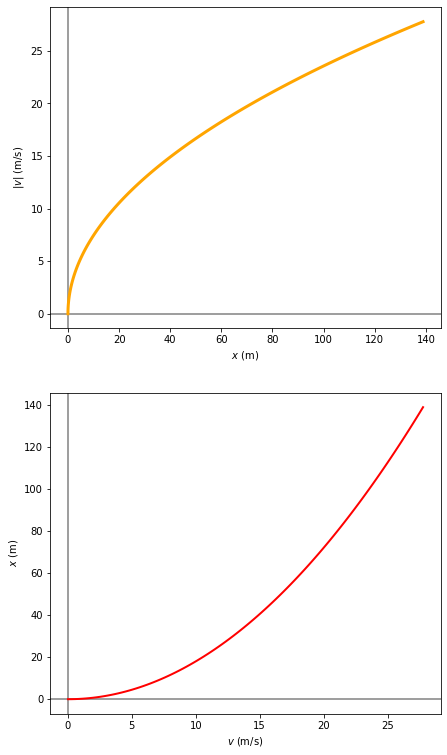

In [3]:
fig2 = plt.figure(figsize=(7, 13))

plt.subplot(2, 1, 1)
plt.plot(x, v, '-', color = 'orange', linewidth = 3)
plt.axhline(color = 'gray', zorder = -1)
plt.axvline(color = 'gray', zorder = -1)
plt.xlabel('$x$ (m)')
plt.ylabel('$|v|$ (m/s)')

plt.subplot(2, 1, 2)
plt.plot(v, x, '-', color = 'red', linewidth = 2)
plt.axhline(color = 'gray', zorder = -1)
plt.axvline(color = 'gray', zorder = -1)
plt.xlabel('$v$ (m/s)')
plt.ylabel('$x$ (m)')

## What we have learned
*Fisica*
* Utilizzare le equazioni del moto con accelerazione costante
* Stimare il valore dell'accelerazione in un tipo di fenomeno che riguarda la vita quotidiana

*Python*
* Widgets
* Tabella contenente link
* Costruire il grafico di una funzione
* Costruire una figura contenente più grafici

## References
#### Equazioni del moto uniformemente accelerato
Serway, Jewett, *Fisica per Scienze e Ingegneria*, EdiSES, vol. I, Quinta Edizione
&nbsp;
#### Array con la libreria **numpy**
[Numpy arrays](https://physics.nyu.edu/pine/pymanual/html/chap3/chap3_arrays.html#numpy-arrays) in David J. Pine, [Introduction to Python for Science](https://physics.nyu.edu/pine/pymanual/html/pymanMaster.html)

[Play with numpy arrays](https://nbviewer.jupyter.org/github/engineersCode/EngComp1_offtheground/blob/master/notebooks_en/4_NumPy_Arrays_and_Plotting.ipynb) in Lorena Barba, Natalia Clementi, [Engineering Computations](https://github.com/engineersCode/EngComp)

#### Grafici di funzioni
[Basic plotting](https://physics.nyu.edu/pine/pymanual/html/chap5/chap5_plot.html#basic-plotting) in  David J. Pine, [Introduction to Python for Science](https://physics.nyu.edu/pine/pymanual/html/pymanMaster.html)

[Time to plot](https://nbviewer.jupyter.org/github/engineersCode/EngComp1_offtheground/blob/master/notebooks_en/4_NumPy_Arrays_and_Plotting.ipynb#Time-to-Plot) in Lorena Barba, Natalia Clementi, [Engineering Computations](https://github.com/engineersCode/EngComp)


### Copyright and License
--------------------------
(c) 2021 Andrea Mandanici, Giuseppe Mandaglio, Giovanni Pirrotta, Valeria Conti Nibali. All content is under Creative Common Attribution  <a rel="license" href="https://creativecommons.org/licenses/by/4.0" > CC BY 4.0 <a/> 
 and all code is under [BSD 3-Clause License](https://opensource.org/licenses/BSD-3-Clause). Notebook based on the Italian version
(c) 2020 Andrea Mandanici, Marco Guarnera, Giuseppe Mandaglio, Giovanni Pirrotta. All content is under Creative Common Attribution  <a rel="license" href="https://creativecommons.org/licenses/by/4.0" > CC BY 4.0 <a/> 
 and all code is under [BSD 3-Clause License](https://opensource.org/licenses/BSD-3-Clause)
